In [ ]:
folder_path = 'data'
# !pip install openpyxl

all_dataframes = []

# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        all_dataframes.append(df)

all_data = pd.concat(all_dataframes, ignore_index=True)

# Opinion assurances - library import

In [74]:
import pandas as pd
import numpy as np
import string
import re
import os

# !pip install pyspellchecker
# from spellchecker import SpellChecker

# !pip install symspellpy
from symspellpy import SymSpell, Verbosity
# !pip install unidecode
from unidecode import unidecode

import nltk
from nltk import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from collections import Counter
from multiprocessing import Pool
from IPython.display import display
from tqdm import tqdm

# !pip install spacy
import spacy

from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

# !pip install gensim
import gensim
from gensim import corpora
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

   ---------------------------------------- 0.0/235.5 kB ? eta -:--:--
   ------------------- -------------------- 112.6/235.5 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 235.5/235.5 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

# Data Import 

In [57]:
all_data = pd.read_csv('data_scrapped_with_company.csv')

# Data info

In [12]:
nan_per_column = all_data.isnull().sum()
nan_per_column

company      17049
stars            0
author           0
date             0
review           1
review_en        1
dtype: int64

In [7]:
all_data

,company,stars,author,date,review,review_en
0,NaN,1,victime,07/08/2022,"Assurance à bannir, 3 ans chez Aviva, j'ai vu ...","Insurance to be banned, 3 years with Aviva, I ..."
1,NaN,1,emma,03/08/2022,J'ai souscrit un perp par l'intermédiaire d'UF...,I took out a perp through UFF with Bee Vie (st...
2,NaN,1,CACO31170,18/07/2022,je ne vous le conseille pas. Depuis janvier 20...,I don't recommend it. Since January 2022 I hav...
3,NaN,2,CLAIRE,13/07/2022,AVIVA devenue ABEILLE ont du mal à régler les ...,AVIVA which became ABEILLE have difficulty set...
4,NaN,1,Emma94,08/07/2022,J'ai fait une demande de rachat d'une assuranc...,I made a request to buy back life insurance on...
...,...,...,...,...,...,...
23583,NaN,4,JEROME H,31/05/2022,"Je suis très satisfait de vos services( Tarif,...","I am very satisfied with your services (price,..."
23584,NaN,4,lara B,31/05/2022,je suis satisfaite du service et des modalités...,I am satisfied with the service and the terms\...
23585,NaN,5,sophie J,31/05/2022,"Je suis à la GMF depuis que j'ai une voiture, ...","I have been at GMF since I had a car, I then t..."
23586,NaN,3,Jean-Paul D,30/05/2022,satisfait des services mais pas du prix sur l'...,satisfied with the services but not with the p...


In [ ]:
all_data[all_data['avis_cor_en'].notnull()][['avis_en','avis_cor_en']]

,avis_en,avis_cor_en
33000,Insurance that puts customers in difficulty. S...,Insurance that puts customers in difficulty. S...
33001,Hello\nMember 3001628. You have sent me a medi...,Hello\nMember 3001628. You have sent me a medi...
33002,I am still waiting for my salary supplement fo...,I am still waiting for my salary supplement fo...
33003,In half treatment the mutual after four reimbu...,In half treatment the mutual after four reimbu...
33004,Notice to colleagues from the territorial publ...,Notice to colleagues from the territorial publ...
...,...,...
33426,Very disappointed with how to proceed with you...,Very disappointed with how to proceed with you...
33427,Pont de Beauvoisin Savoie agency\nIncompetence...,Pont de Beauvoisin Savoie agency\nIncompetence...
33428,hello\nThe assistance is deplorable and the au...,hello\nThe assistance is deplorable and the au...
33429,Hello I subscribed to a damage contract work a...,Hello I subscribed to a damage contract work a...


In [4]:
duplicate_rows = all_data[all_data.duplicated(keep=False)]

In [5]:
duplicate_rows_sorted = duplicate_rows.sort_values(by=list(all_data.columns))

In [6]:
duplicate_rows_sorted

,company,stars,author,date,review,review_en
26218,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26228,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26238,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26248,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26258,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
...,...,...,...,...,...,...
24689,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24723,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24757,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24791,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."


In [92]:
all_data["company"].value_counts()

company
direct assurance               2000
olivier assurances             1999
gmf                            1995
societe generale assurances    1797
macif                          1444
matmut                         1327
allianz                        1157
axa                            1139
generali                        826
malakoff humanis                571
swiss life                      529
credit mutuel                   514
harmonies mutuelles             489
cnp assurances                  447
caisse d epargne                424
cic                             141
abeille assurances              126
lcl                             112
mutex                            34
Name: count, dtype: int64

# Data Cleaning

In [7]:
# all_data['avis_en'] = all_data['avis_cor_en'].combine_first(all_data['avis_en'])
# all_data['avis'] = all_data['avis_cor'].combine_first(all_data['avis'])

In [8]:
# all_data.drop(['avis_cor', 'avis_cor_en'], axis=1, inplace=True)
# all_data = all_data.dropna(subset=['avis_en'])

In [58]:
all_data['company'] = all_data['company'].str.replace(r'^https://www.opinion-assurances.fr/assureur-', '', regex=True)
all_data['company'] = all_data['company'].str.replace(r'\.html.*$', '', regex=True)
all_data['company'] = all_data['company'].str.replace('-', ' ', regex=True)

In [59]:
all_data = all_data.drop_duplicates()
all_data = all_data.dropna(subset=('review'))

# Data processing new columns

In [60]:
def generate_trigrams(token_list):
    return [' '.join(trigram) for trigram in ngrams(token_list, 3) if len(trigram) == 3]

def preprocess_text(df, text_column):
    # Vérification des valeurs manquantes et remplacement par string vides
    df[text_column] = df[text_column].fillna("").astype(str)

    # Nettoyage de base du texte
    df[text_column] = df[text_column].str.lower().str.translate(str.maketrans('', '', string.punctuation))

    # Tokenisation
    df['review_en_tokenized'] = df[text_column].apply(word_tokenize)

    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    symbols = ['“', '”', 'malakoff', 'macif', 'lcl', 'matmut', 'allianz', 'axa', 'mutex', 'swiss', 'generali', 'gmf']
    df['review_en_no_stopwords'] = df['review_en_tokenized'].apply(lambda x: [word for word in x 
                                                                              if word not in stop_words 
                                                                              and word not in symbols and len(word)>2])

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    df['review_en_lemmatized'] = df['review_en_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Création des trigrammes
    df['trigrammes'] = df['review_en_lemmatized'].apply(generate_trigrams)

    return df


all_data = preprocess_text(all_data, 'review_en')

In [241]:
all_data.columns

Index(['company', 'stars', 'author', 'date', 'review', 'review_en',
       'review_en_tokenized', 'review_en_no_stopwords', 'review_en_lemmatized',
       'trigrammes'],
      dtype='object')

# Trigrammes et TF-IDF

In [227]:
all_data['trigrammes_joined'] = all_data['trigrammes'].apply(lambda x: ' '.join(x))

# Créer un objet TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer TF-IDF aux trigrammes joints
tfidf_matrix = vectorizer.fit_transform(all_data['trigrammes_joined'])

# Embedding to Identify Similar Words : Word2Vec

In [9]:
# 1. Préparation des données
data = all_data['review_en_lemmatized']

In [10]:
# 2. Entraînement de Word2Vec
model_w2v = Word2Vec(data, min_count=1)
words = list(model_w2v.wv.key_to_index)

In [11]:
# Choisissez un nombre de mots à visualiser
num_words = 100

# Créez une liste de vecteurs de mots
word_vectors = np.array([model_w2v.wv[word] for word in words[:num_words]])

In [12]:
# Utilisez PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
result_pca = pca.fit_transform(word_vectors)

In [13]:
# Utilisez t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
result_tsne = tsne.fit_transform(word_vectors)

# Glove

In [14]:
model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False, no_header=True)

In [15]:
words_glove = list(model.key_to_index)
word_vectors_glove = np.array([model[word] for word in words[:num_words]])

# Appliquer PCA
result_pca_glove = pca.fit_transform(word_vectors_glove)

# Appliquer t-SNE
result_tsne_glove = tsne.fit_transform(word_vectors_glove)

# Visualisation des embeddings : Word2Vec

In [16]:
# Créez une fonction pour tracer les résultats
def plot_results(result, words):
    plt.figure(figsize=(12,8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

Visualisation PCA :


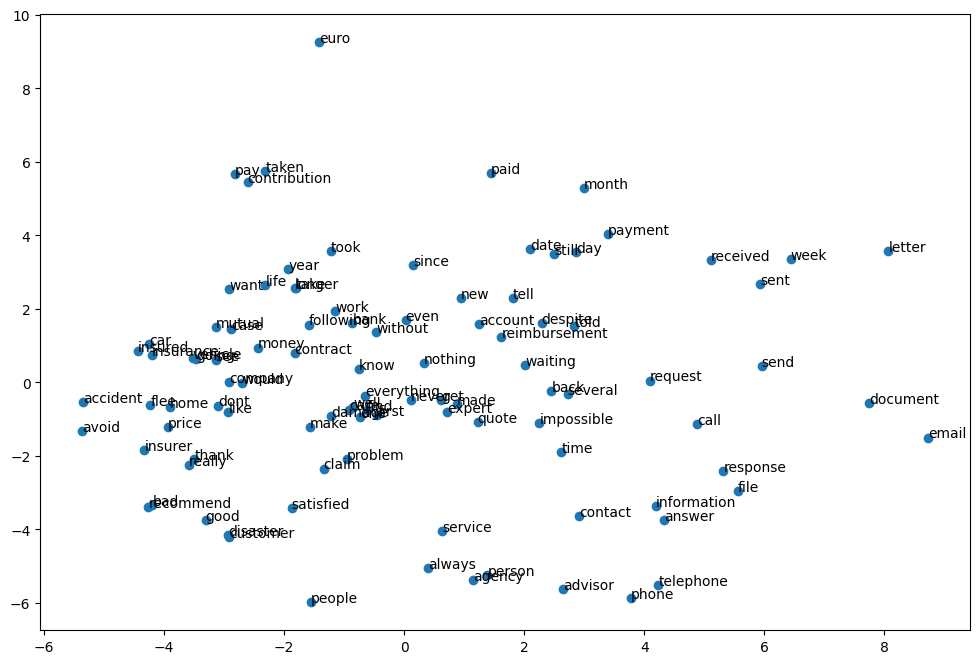

In [17]:
# Visualisez les résultats de PCA
print("Visualisation PCA :")
plot_results(result_pca, words[:num_words])

Visualisation t-SNE :


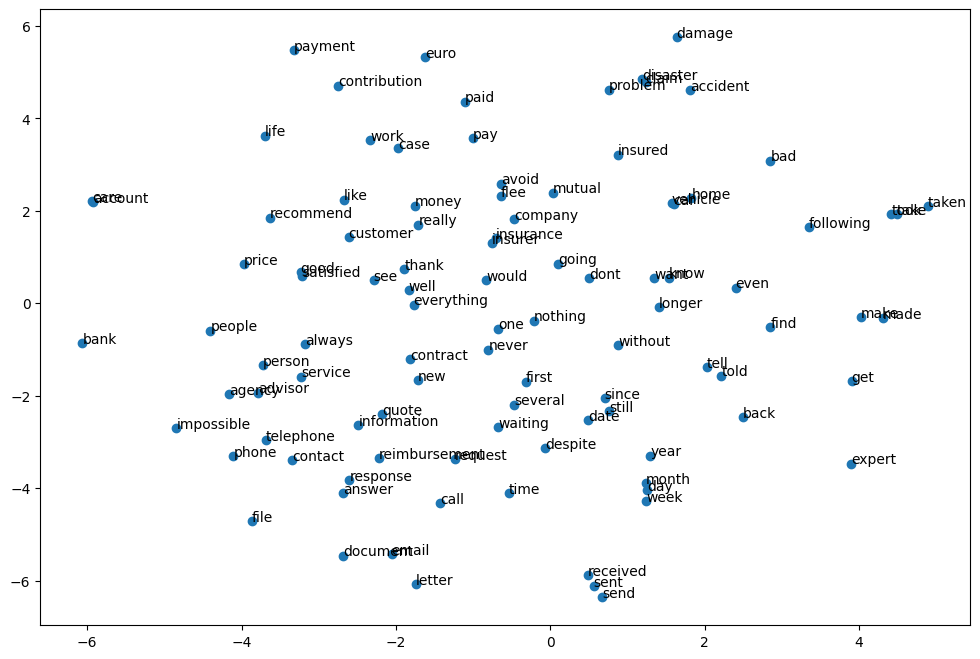

In [18]:
# Visualisez les résultats de t-SNE
print("Visualisation t-SNE :")
plot_results(result_tsne, words[:num_words])

# Visualisation des embeddings : Glove

Visualisation PCA :


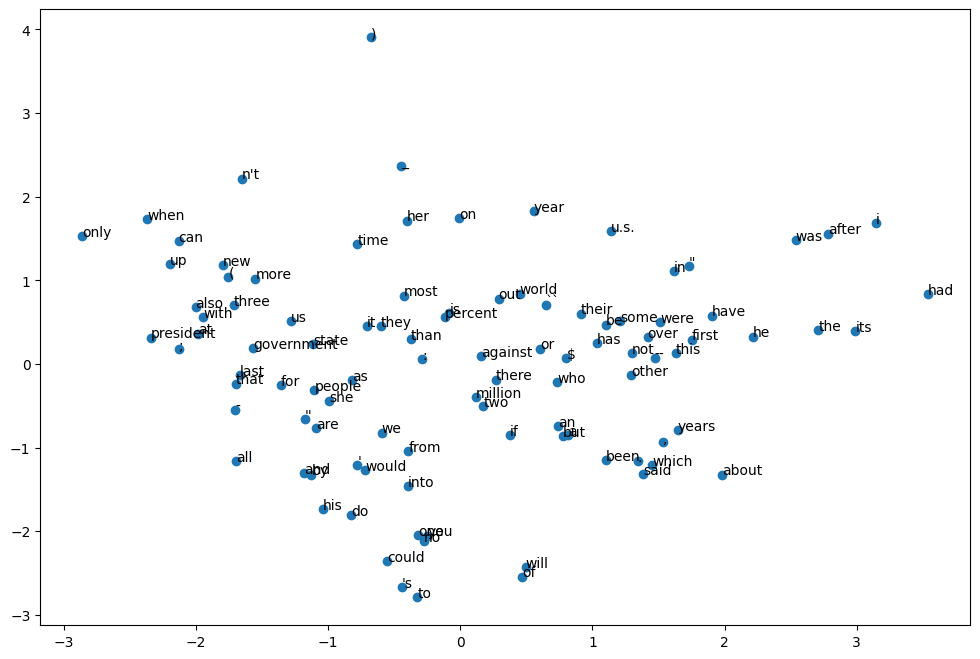

In [19]:
# Visualisez les résultats de PCA
print("Visualisation PCA :")
plot_results(result_pca_glove, words_glove[:num_words])

Visualisation t-SNE :


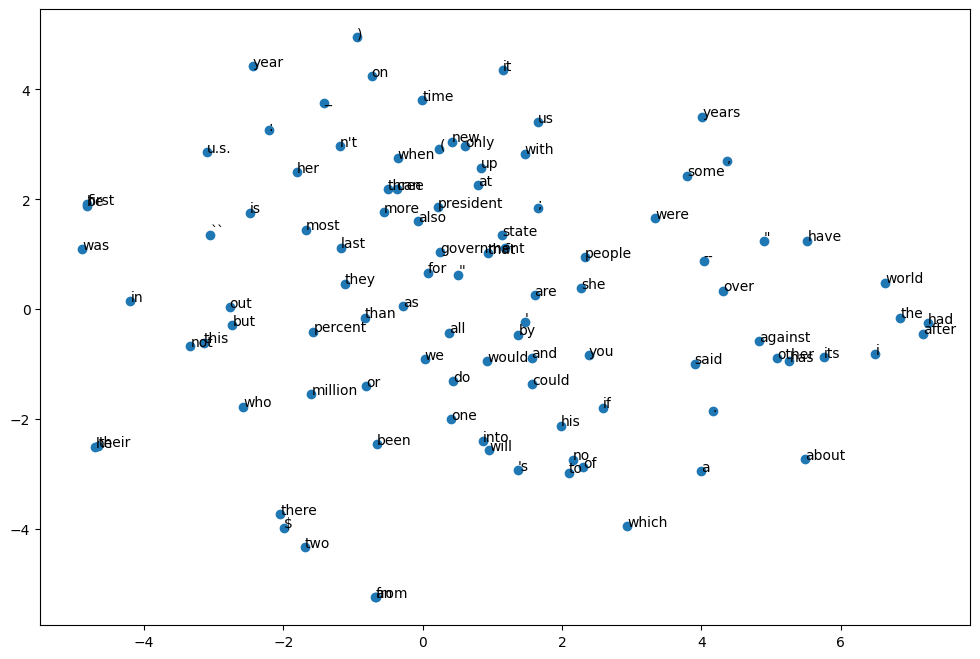

In [20]:
# Visualisez les résultats de t-SNE
print("Visualisation t-SNE :")
plot_results(result_tsne_glove, words_glove[:num_words])

# 2 methods of Semantic Search and cosine and euclidean distannces

In [21]:
data_search = [' '.join(doc) for doc in data]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_search)

In [22]:
model_sentencetransformers = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model_sentencetransformers.encode(data_search)

In [23]:
euclidean_dist = euclidean_distances(X)
cosine_dist = cosine_distances(X)

In [24]:
def semantic_search_bert(query, model, embeddings):
    query_embedding = model.encode([query])
    dists = cosine_distances(query_embedding, embeddings)
    index = np.argmin(dists)
    return data_search[index]

# Exemple d'utilisation de la recherche sémantique
result1 = semantic_search_bert('accident', model_sentencetransformers, embeddings)

In [25]:
def semantic_search(query, data, vectorizer):
    query_vec = vectorizer.transform([query])
    dists = cosine_distances(query_vec, X)
    index = np.argmin(dists)

    return data[index]

# Exemple d'utilisation de la recherche sémantique
result2 = semantic_search('accident', data_search, vectorizer)

In [26]:
result1

'following accident fault'

In [27]:
result2

'disability recognized following service accident compensation considers type accident accident good paying contribution compensation case problem'

# Visualisation des embeddings

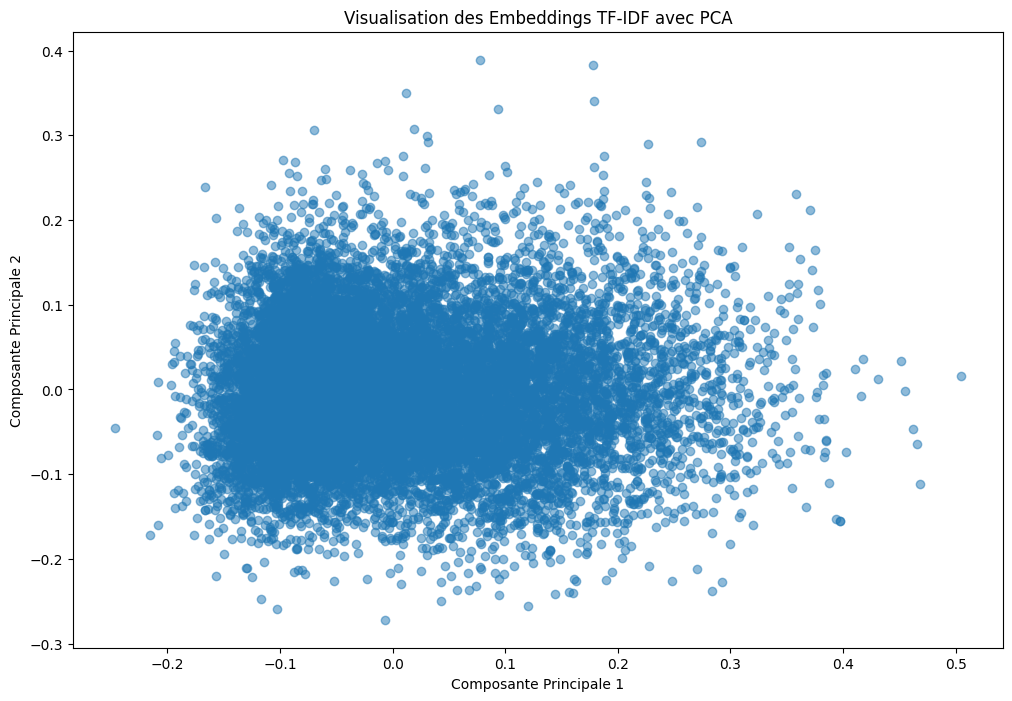

In [228]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title('Visualisation des Embeddings TF-IDF avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

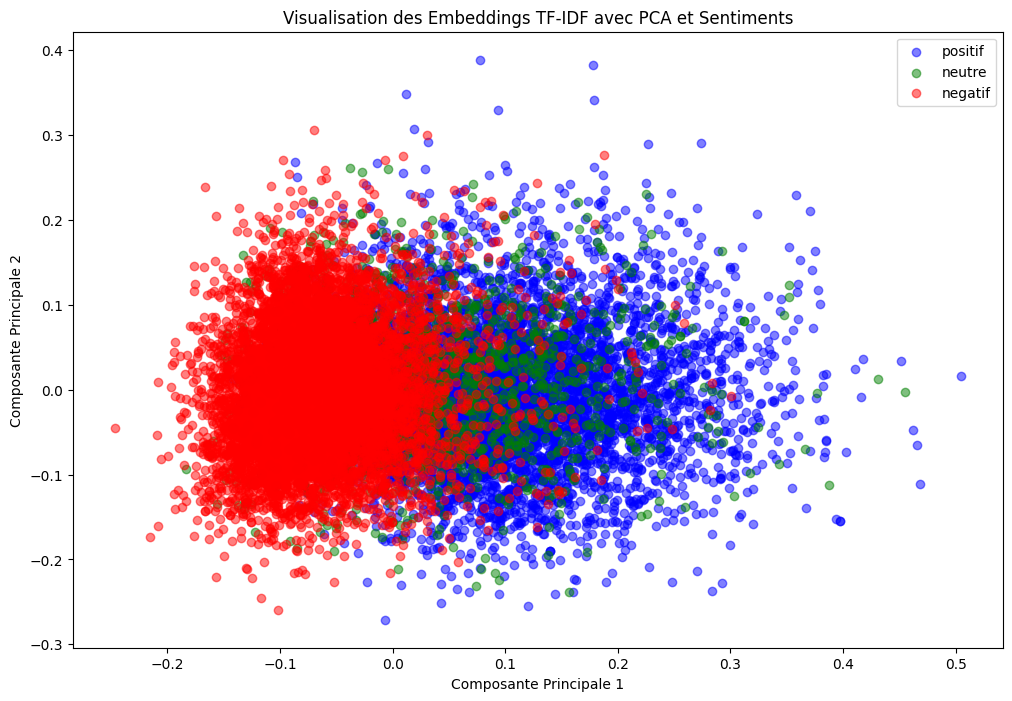

In [210]:
def stars_to_sentiment(number_of_stars):
    if number_of_stars >= 4:  # Supposons que 4 et 5 étoiles sont positifs
        return 'positif'
    elif number_of_stars <= 2:  # Supposons que 1 et 2 étoiles sont négatifs
        return 'negatif'
    else:  # Supposons que 3 étoiles sont neutres
        return 'neutre'

# Appliquez la fonction pour créer une nouvelle colonne 'sentiment'
all_data['sentiment'] = all_data['stars'].apply(stars_to_sentiment)

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(tfidf_matrix.toarray())

# Mapping des couleurs aux sentiments
color_map = {'positif': 'blue', 'negatif': 'red', 'neutre': 'green'}

# Visualisation avec Matplotlib
plt.figure(figsize=(12, 8))
for sentiment in ['positif', 'neutre', 'negatif']:
    indices = all_data['sentiment'] == sentiment
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1],
                alpha=0.5, c=color_map[sentiment], label=sentiment)
plt.title('Visualisation des Embeddings TF-IDF avec PCA et Sentiments')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.show()

In [212]:
# Séparation des données en ensembles d'entraînement et de test
X = tfidf_matrix  # Vos features TF-IDF
y = all_data['sentiment']  # Les labels que vous venez de créer

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

test_indices = y_test.index

# Construction du modèle de machine learning
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction des sentiments sur l'ensemble de test
y_pred = rf_model.predict(X_test)

all_data.loc[test_indices, 'predicted_sentiment'] = y_pred

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Filtrez pour voir où les prédictions ne correspondent pas aux labels réels
misclassified = all_data.loc[test_indices][all_data['sentiment'] != all_data['predicted_sentiment']]

# Affichez des exemples d'avis mal classifiés
print(misclassified[['review_en', 'sentiment', 'predicted_sentiment']].sample(10))

Accuracy: 0.8339677891654466

Classification Report:
               precision    recall  f1-score   support

     negatif       0.85      0.96      0.90      1900
      neutre       1.00      0.00      0.01       363
     positif       0.81      0.88      0.84      1152

    accuracy                           0.83      3415
   macro avg       0.89      0.62      0.58      3415
weighted avg       0.85      0.83      0.79      3415

                                               review_en sentiment  \
23245  i am satisfied with your services thank you an...   positif   
23757  i had to wait very little before getting an ad...    neutre   
8546   im satisfied because its quick cheaper and eve...    neutre   
12689  everyone criticizes whatever the mutual compan...   positif   
12934  i am retired from st gobain pam so i have rema...    neutre   
14954  macif and our family are almost friendship to ...    neutre   
3892   signing up for my agency contract is quick but...   negatif   
23728

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\81013298.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  misclassified = all_data.loc[test_indices][all_data['sentiment'] != all_data['predicted_sentiment']]


# Modèles avec des couches d'embedding

In [217]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder
import numpy as np
import re

def preprocess_text_keras(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Optionnel: autres étapes de nettoyage...
    return text

# Appliquer la fonction de prétraitement à vos avis
all_data['review_en_keras'] = all_data['review_en'].apply(preprocess_text_keras)

# Analyser la taille du vocabulaire
word_counts = sum([len(set(review.split())) for review in all_data['review_en_keras']])
print(f"Nombre total de mots uniques : {word_counts}")

# Calculer la longueur moyenne ou médiane des avis
review_lengths = [len(review.split()) for review in all_data['review_en_keras']]
average_length = sum(review_lengths) / len(review_lengths)
median_length = sorted(review_lengths)[len(review_lengths) // 2]
print(f"Longueur moyenne des avis : {average_length}")
print(f"Longueur médiane des avis : {median_length}")

# Choisissez vocab_size et max_length en fonction de ces valeurs
vocab_size = min(10000, word_counts)  # par exemple, limiter à 10 000 ou au nombre total de mots uniques
max_length = int(average_length)  # ou utiliser la longueur médiane ou une autre valeur basée sur votre analyse


# Création et adaptation du tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(all_data['review_en_keras'])
sequences = tokenizer.texts_to_sequences(all_data['review_en_keras'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Padding des séquences pour qu'elles aient toutes la même longueur
data = pad_sequences(sequences, maxlen=max_length)

# Conversion des labels en numérique
le = LabelEncoder()
labels = le.fit_transform(all_data['sentiment'])
labels = np.asarray(labels)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Construction du modèle avec Dropout pour réduire le surapprentissage
model = Sequential()
model.add(Embedding(vocab_size, 16, input_length=max_length))
model.add(Dropout(0.5))  # Ajout d'une couche de dropout
model.add(Flatten())
model.add(Dense(3, activation='softmax'))  # 3 classes: positif, negatif, neutre

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks pour l'arrêt précoce et TensorBoard
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
tensorboard_callback = TensorBoard(log_dir='./logs')

# Entraînement du modèle avec les callbacks
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
          callbacks=[early_stopping, tensorboard_callback])

Nombre total de mots uniques : 797470
Longueur moyenne des avis : 64.58010661355515
Longueur médiane des avis : 39
Found 22841 unique tokens.
Epoch 1/10
374/374 [==============================] - 2s 5ms/step - loss: 0.7115 - accuracy: 0.7351 - val_loss: 0.5241 - val_accuracy: 0.8327
Epoch 2/10
374/374 [==============================] - 1s 4ms/step - loss: 0.4791 - accuracy: 0.8376 - val_loss: 0.4606 - val_accuracy: 0.8493
Epoch 3/10
374/374 [==============================] - 1s 4ms/step - loss: 0.4195 - accuracy: 0.8546 - val_loss: 0.4450 - val_accuracy: 0.8549
Epoch 4/10
374/374 [==============================] - 1s 4ms/step - loss: 0.3753 - accuracy: 0.8683 - val_loss: 0.4428 - val_accuracy: 0.8544
Epoch 5/10
374/374 [==============================] - 2s 4ms/step - loss: 0.3354 - accuracy: 0.8797 - val_loss: 0.4393 - val_accuracy: 0.8567
Epoch 6/10
374/374 [==============================] - 1s 4ms/step - loss: 0.2943 - accuracy: 0.8988 - val_loss: 0.4473 - val_accuracy: 0.8549
Epoch 

# Modèle avec des embeddings pré-entraînés et visualisation avec Tensorboard

In [221]:
embeddings_index = {}
embedding_dim = 100
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = []
        for val in values[1:]:
            try:
                coefs.append(float(val))
            except ValueError:
                # Ignorer les valeurs mal formatées
                pass
        coefs = np.asarray(coefs, dtype='float32')
        if coefs.shape[0] == embedding_dim:
            embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')


# Création de la matrice d'embedding
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Construction du modèle
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(32))  # 'return_sequences' est False par défaut
model.add(Dense(3, activation='softmax'))  # Ajustez le nombre de sorties en fonction de vos classes

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Found 400000 word vectors.


In [222]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tensorboard_callback = TensorBoard(log_dir=os.path.join('logs', 'glove_lstm'))

# Entraînement du modèle
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, tensorboard_callback])

# Évaluation du modèle
evaluation = model.evaluate(X_test, y_test)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

Epoch 1/20
187/187 [==============================] - 7s 24ms/step - loss: 0.6619 - accuracy: 0.7510 - val_loss: 0.5196 - val_accuracy: 0.8208
Epoch 2/20
187/187 [==============================] - 4s 22ms/step - loss: 0.5175 - accuracy: 0.8194 - val_loss: 0.4856 - val_accuracy: 0.8333
Epoch 3/20
187/187 [==============================] - 5s 24ms/step - loss: 0.4902 - accuracy: 0.8289 - val_loss: 0.4864 - val_accuracy: 0.8370
Epoch 4/20
187/187 [==============================] - 5s 26ms/step - loss: 0.4730 - accuracy: 0.8359 - val_loss: 0.4714 - val_accuracy: 0.8395
Epoch 5/20
187/187 [==============================] - 4s 23ms/step - loss: 0.4604 - accuracy: 0.8404 - val_loss: 0.4570 - val_accuracy: 0.8454
Epoch 6/20
187/187 [==============================] - 6s 30ms/step - loss: 0.4468 - accuracy: 0.8441 - val_loss: 0.4605 - val_accuracy: 0.8448
Epoch 7/20
187/187 [==============================] - 6s 32ms/step - loss: 0.4360 - accuracy: 0.8481 - val_loss: 0.4526 - val_accuracy: 0.8479

# Spellchecker

In [6]:
words = all_data.head(20)['review_en_lemmatized']

In [7]:
frequent_words = Counter([word for sublist in words for word in sublist])
frequent_words.most_common(10)

[('vehicle', 8),
 ('contract', 8),
 ('insurance', 8),
 ('abeille', 8),
 ('day', 8),
 ('without', 6),
 ('people', 6),
 ('take', 6),
 ('money', 6),
 ('one', 5)]

In [43]:
# Initialisation de SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "fr-100k.txt"  # Remplacez par le chemin vers votre dictionnaire français
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [44]:
def spell_check(word_list):
    corrected_list = []
    for word in word_list:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_list.append(suggestions[0].term)
        else:
            corrected_list.append(word)
    return corrected_list

In [68]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
def preprocess_text_fr(df, text_column):
    
    # Ensure the column is a string type
    df[text_column] = df[text_column].fillna("").astype(str)

    df[text_column] = df[text_column].apply(unidecode)

    df[text_column] = df[text_column].replace("'", " ")
    
    # Basic text cleaning
    df[text_column] = df[text_column].str.lower().str.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('french'))
    df['review_fr_no_stopwords'] = df[text_column].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and len(word)>2]))

    # Tokenization
    df['review_fr_tokenized'] = df['review_fr_no_stopwords'].apply(lambda x: word_tokenize(x))

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    df['review_fr_lemmatized'] = df['review_fr_tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Generate trigrams
    df['trigrammes'] = df['review_fr_lemmatized'].apply(generate_trigrams)

    return df

In [89]:
dffr = preprocess_text_fr(all_data, 'review')

In [90]:
dffr['review_spellcheck'] = dffr['review_fr_lemmatized'].apply(spell_check)

In [ ]:
all_data[['review_spellcheck', 'review_fr_lemmatized']]

,review_spellcheck,review_fr_lemmatized
0,"[lors, du, change, telephonique, un, conseille...","[lors, dun, echange, telephonique, lun, consei..."
1,"[voulez, avoir, interlocuteurs, peuvent, rien,...","[voulez, avoir, interlocuteurs, peuvent, rien,..."
2,"[vÃ©hicule, tombe, panne, appelle, assistance,...","[vehicule, tombe, panne, jappelle, lassistance..."
3,"[jetais, choque, savoir, quatre, payer, valeur...","[jetais, choque, savoir, quapres, payer, valeu..."
4,"[aires, avoir, remplir, signe, contrat, obliqu...","[apres, avoir, rempli, signe, contrat, obseque..."
...,...,...
26263,"[fois, assure, employeur, client, cette, lamen...","[fois, assure, employeur, client, cette, lamen..."
26264,"[pareil, autres, avis, essaie, joindre, depuis...","[pareil, autres, avis, jessaie, joindre, depui..."
26265,"[humains, tait, dÃ©plorable, terme, respect, d...","[humanis, etait, deplorable, terme, respect, d..."
26266,"[mot, tellement, professionnels, dÃ©plorables,...","[mot, tellement, professionnels, deplorables, ..."


In [83]:
all_data[all_data['review_spellcheck']!=all_data['review_fr_lemmatized']][['review_spellcheck', 'review_fr_lemmatized']]

,review_spellcheck,review_fr_lemmatized
0,"[lors, du, change, telephonique, un, conseille...","[lors, dun, echange, telephonique, lun, consei..."
1,"[voulez, avoir, interlocuteurs, peuvent, rien,...","[voulez, avoir, interlocuteurs, peuvent, rien,..."
2,"[vÃ©hicule, tombe, panne, appelle, assistance,...","[vehicule, tombe, panne, jappelle, lassistance..."
3,"[jetais, choque, savoir, quatre, payer, valeur...","[jetais, choque, savoir, quapres, payer, valeu..."
4,"[aires, avoir, remplir, signe, contrat, obliqu...","[apres, avoir, rempli, signe, contrat, obseque..."
...,...,...
26263,"[fois, assure, employeur, client, cette, lamen...","[fois, assure, employeur, client, cette, lamen..."
26264,"[pareil, autres, avis, essaie, joindre, depuis...","[pareil, autres, avis, jessaie, joindre, depui..."
26265,"[humains, tait, dÃ©plorable, terme, respect, d...","[humanis, etait, deplorable, terme, respect, d..."
26266,"[mot, tellement, professionnels, dÃ©plorables,...","[mot, tellement, professionnels, deplorables, ..."


In [47]:
pd.reset_option('display.max_colwidth')

In [41]:
pd.set_option('display.max_colwidth', None)

In [42]:
all_data[all_data['review_spellcheck'] != all_data['review_en_lemmatized']][['review_spellcheck', 'review_en_lemmatized']]

,review_spellcheck,review_en_lemmatized
1,"[want, people, talk, cant, anything, debiting, asked, stop, debit, want, recover, fund, take, week, tell, need, additional, document, trust, belle, assurance, champion]","[want, people, talk, cant, anything, debiting, asked, stop, debit, want, recover, fund, take, week, tell, need, additional, document, trust, abeille, assurance, champion]"
2,"[vehicle, break, call, assistance, tell, tow, truck, arrive, minute, hour, picked, hour, later, recommend, belle, assurance, assistance]","[vehicle, break, call, assistance, tell, tow, truck, arrive, minute, hour, picked, hour, later, recommend, abeille, assurance, assistance]"
8,"[disappointed, insurer, charged, 100, euro, reason, year, euro, forgot, move, tell, car, parked, closed, place, euro, month, done, even, know, doesn't, personal, space, worthy, name, online, never, seen, pathetic, insurance, put, mildly, flee, unfriendly, even, rude, interlocutor, part, take, care, terminating, contract, tomorrow]","[disappointed, insurer, charged, 100, euro, reason, year, euro, forgot, move, tell, car, parked, closed, place, euro, month, dont, even, know, doesnt, personal, space, worthy, name, online, never, seen, pathetic, insurance, put, mildly, flee, unfriendly, even, rude, interlocutor, part, take, care, terminating, contract, tomorrow]"
9,"[troubleshooting, 061123, breakdown, audi, locked, closed, key, trunk, waiting, answering, friendliness, professionalism, followup, efficiency, mandated, repairer, short, faultless, round, able, get, back, road, around, call, assistance, bravo, belle, pad, convenience, store, clermontferrand, austere]","[troubleshooting, 061123, breakdown, audi, locked, closed, key, trunk, waiting, answering, friendliness, professionalism, followup, efficiency, mandated, repairer, short, faultless, round, able, get, back, road, around, call, assistance, bravo, abeille, apad, convenience, store, clermontferrand, aubiere]"
11,"[insured, taken, maximum, guarantee, except, storm, natural, disaster, passed, june, 2023, storm, tore, roof, day, interlocutor, pass, buck, telling, file, management, meanwhile, house, taking, water, sides, sleep, floor, makeshift, bed, everything, rotten, wall, furniture, appliance, etc, expert, gave, favorable, opinion, nothing, change, investigating, find, loss, inhumane, people, avoided, collect, money, nonexistent, next, called, every, week, never, get, person, tell, understand, cant, anything, sent, multitude, email, always, without, response, think, vigilant, taking, insurance, going, let, happen, justice, exists, going, refer, word, wise]","[insured, taken, maximum, guarantee, except, storm, natural, disaster, passed, june, 2023, storm, tore, roof, day, interlocutor, pass, buck, telling, file, management, meanwhile, house, taking, water, sideswe, sleep, floor, makeshift, bed, everything, rotten, wall, furniture, appliance, etc, expert, gave, favorable, opinion, nothing, change, investigating, find, loss, inhumane, people, avoided, collect, money, nonexistent, next…, called, every, week, never, get, person, tell, understand, cant, anything, sent, multitude, email, always, without, response, think, vigilant, taking, insurance, going, let, happen, justice, exists, going, refer, word, wise]"
...,...,...
26260,"[november, 2020, since, january, 2020, permanently, retired, since, april, regularly, called, malakoffhumanis, walk, around, telling, file, complete, nothing, send, payment, calculated, since, sent, registered, letter, put, several, message, dedicated, site, fact, site, rubbish, never, response, call, come, across, person, always, tell, thing, always, give, readymade, response, really, feel, like, made, fun, seems, ovid, ovid, suit, well, company, worked, like, would, fired, would, add, since, april, called, every, month]","[november, 2020, since, january, 2020, permanently, retired, since, april, regularly, called, malakoffhumanis, walk, around, telling, file, complete, nothing, send, payment, c

# Word frequency

In [229]:
def freq_words(x, terms = 30):
  all_words = []
  for text in x:
    all_words.extend(text)
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  plt.show()

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3644089223.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


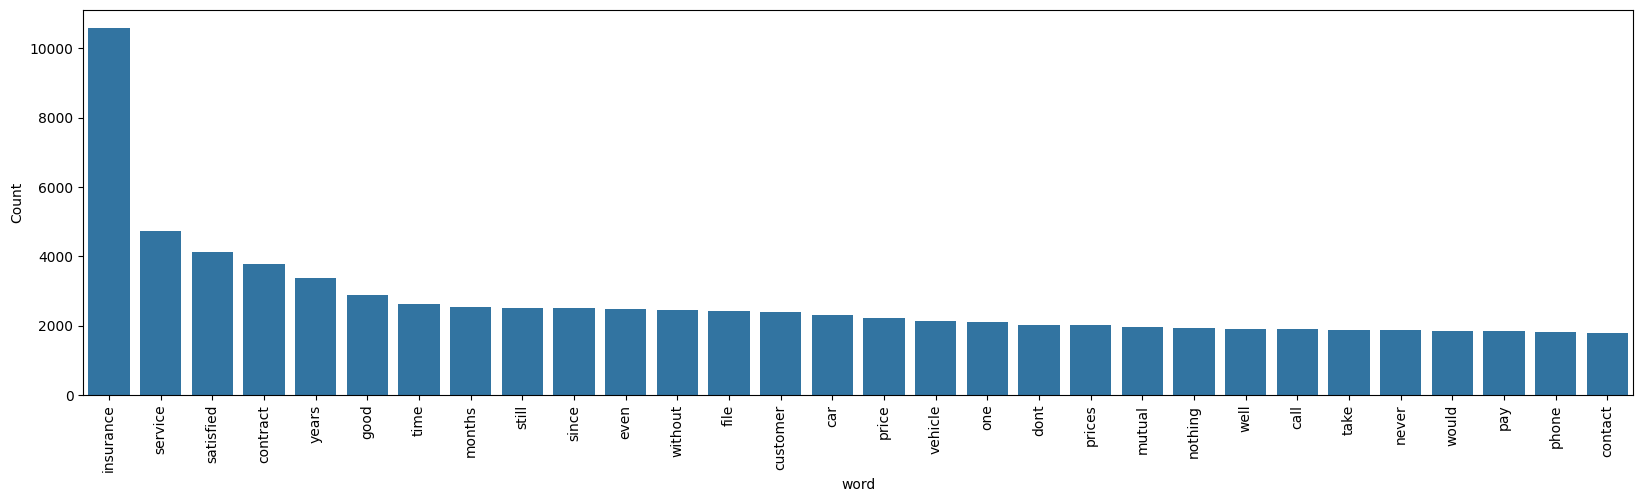

In [230]:
freq_words(all_data['review_en_no_stopwords'])

# Topic modeling

In [231]:
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3644089223.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


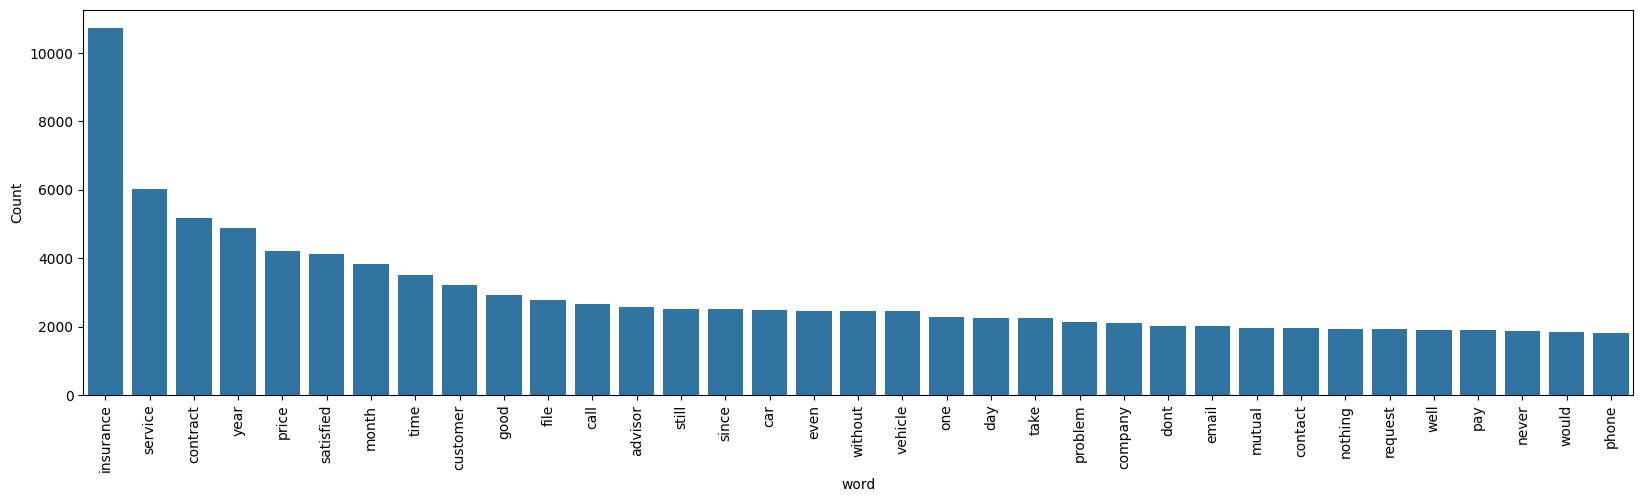

In [193]:
reviews = freq_words(all_data['review_en_lemmatized'], 35)

In [232]:
reviews = [words for words in all_data["review_en_lemmatized"].tolist()]

In [233]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews)
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [234]:
lda_model.print_topics()

[(0,
  '0.043*"price" + 0.026*"vehicle" + 0.025*"suit" + 0.024*"expensive" + 0.023*"compared" + 0.019*"1996" + 0.014*"little" + 0.013*"driver" + 0.013*"commercial" + 0.012*"car"'),
 (1,
  '0.055*"service" + 0.052*"satisfied" + 0.038*"price" + 0.023*"insurance" + 0.022*"good" + 0.016*"advisor" + 0.015*"recommend" + 0.013*"customer" + 0.013*"well" + 0.011*"thank"'),
 (2,
  '0.015*"insurance" + 0.013*"call" + 0.012*"dont" + 0.012*"time" + 0.012*"vehicle" + 0.010*"day" + 0.009*"car" + 0.009*"one" + 0.009*"take" + 0.008*"phone"'),
 (3,
  '0.018*"document" + 0.017*"month" + 0.016*"file" + 0.016*"email" + 0.015*"since" + 0.013*"request" + 0.013*"received" + 0.012*"still" + 0.012*"sent" + 0.012*"time"'),
 (4,
  '0.038*"mutual" + 0.026*"reimbursement" + 0.016*"humanis" + 0.014*"pension" + 0.011*"company" + 0.010*"health" + 0.010*"file" + 0.007*"since" + 0.007*"year" + 0.007*"time"'),
 (5,
  '0.038*"expert" + 0.037*"damage" + 0.021*"water" + 0.018*"work" + 0.013*"report" + 0.012*"following" + 0.

In [235]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.087854 -0.020235       1        1  23.393705
2      0.132610  0.026735       2        1  22.903806
3      0.182891  0.064639       3        1  19.595714
1      0.074546 -0.169571       4        1  15.895677
4      0.105616  0.082842       5        1  10.261317
5     -0.302048  0.258036       6        1   4.626662
0     -0.281469 -0.242447       7        1   3.323119, topic_info=          Term         Freq        Total Category  logprob  loglift
351  satisfied  4329.000000  4329.000000  Default  30.0000  30.0000
572      price  3905.000000  3905.000000  Default  29.0000  29.0000
132    service  6127.000000  6127.000000  Default  28.0000  28.0000
774     mutual  2055.000000  2055.000000  Default  27.0000  27.0000
50     vehicle  1869.000000  1869.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
157        car   207.259803  2014.221734   Topic7  -4.4302   1.1303
509        new   132.192296   916.693726   Topic7  -4.8799   1.4678
901     option    95.724102   386.075410   Topic7  -5.2027   2.0097
26     insured   105.067333  1464.932606   Topic7  -5.1096   0.7693
334      think    90.010862   663.668974   Topic7  -5.2643   1.4064

[456 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
3805       7  0.996106   1996
2609       5  0.991341   2010
1402       1  0.088467   2020
1402       3  0.591948   2020
1402       5  0.291420   2020
...      ...       ...    ...
52         5  0.080199   year
52         7  0.011696   year
53         7  0.996770  young
16361      3  0.987388   €690
4301       5  0.987916   €850

[745 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 2, 5, 6, 1])

In [236]:
# Extract topics from lda_model
topics = lda_model.print_topics()

def name_topics(topics, num_words=3):
    topic_names = []
    for topic in topics:
        # Extract words from each topic string
        words = re.findall(r'"([^"]*)"', topic[1])
        # Use the top num_words words to name the topic
        topic_names.append('_'.join(words[:num_words]))
    return topic_names

# Use the function
topic_names = name_topics(topics)
for i, name in enumerate(topic_names):
    print(f"Topic {i+1}: {name}")

Topic 1: price_vehicle_suit
Topic 2: service_satisfied_price
Topic 3: insurance_call_dont
Topic 4: document_month_file
Topic 5: mutual_reimbursement_humanis
Topic 6: expert_damage_water
Topic 7: insurance_year_contract
